Accuracy: 0.7467532467532467
Precision: 0.66
Recall: 0.6
F1 Score: 0.6285714285714286


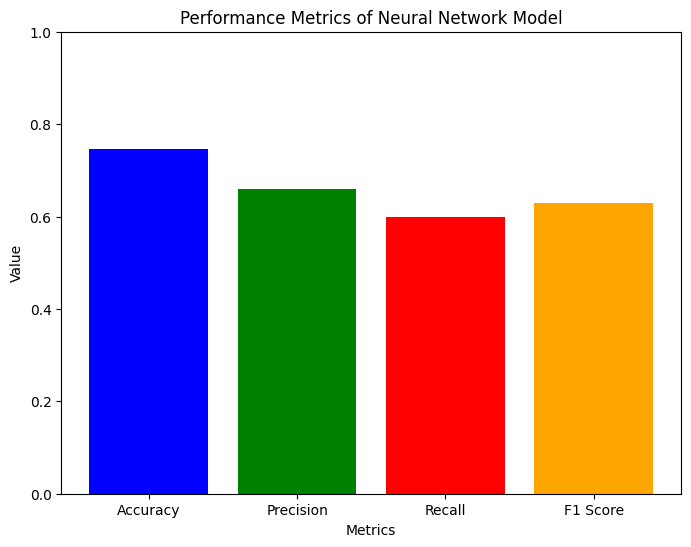

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('/content/diabetes.csv')

# Tiền xử lý dữ liệu
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Huấn luyện mô hình Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = mlp_model.predict(X_test_scaled)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# In các chỉ số đánh giá
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Hiển thị biểu đồ cột về hiệu suất của mô hình
plt.figure(figsize=(8, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])
plt.title('Performance Metrics of Neural Network Model')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Đặt giới hạn trục y từ 0 đến 1
plt.show()
